# Paras Patel- Day7 Assignment


Problem Statement: A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
A sizeable department has to be maintained, for the purposes of recruiting new talent
More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company
Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Since you are one of the star analysts at the firm, this project has been given to you.

Goal of the case study You are required to model the probability of attrition. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

Columns
EmployeeIDEmployee number/id
EnvironmentSatisfactionWork Environment Satisfaction Level
JobSatisfactionJob Involvement Level Job Involvement Level Job Involvement Level
WorkLifeBalanceWork life balance level

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filepath = r"C:\Users\user\Documents\LetsUpgrade\Notes\Day7\Assignment\general_data.csv"
data = pd.read_csv(filepath)

In [3]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
data.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8
4409,40,No,Travel_Rarely,Research & Development,28,3,Medical,1,4410,Male,...,0.0,Y,12,8,0,NaN,6,21,3,9


In [5]:
data.shape

(4410, 24)

In [6]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [8]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [9]:
data = data.dropna()
data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,1.0,Y,18,8,0,6.0,2,6,1,5
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2


In [10]:
data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [11]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4404    False
4405    False
4406    False
4407    False
4408    False
Length: 4382, dtype: bool

In [12]:
data.drop_duplicates()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,1.0,Y,18,8,0,6.0,2,6,1,5
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2


In [13]:
data['Attrition'].value_counts()

No     3677
Yes     705
Name: Attrition, dtype: int64

In [36]:
data[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears',
            'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4382.0,36.933364,9.137272,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,4382.0,9.198996,8.105396,1.0,2.0,7.0,14.0,29.0
Education,4382.0,2.912369,1.024728,1.0,2.0,3.0,4.0,5.0
MonthlyIncome,4382.0,65061.702419,47142.310175,10090.0,29110.0,49190.0,83790.0,199990.0
NumCompaniesWorked,4382.0,2.693291,2.497832,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,4382.0,15.210634,3.663007,11.0,12.0,14.0,18.0,25.0
TotalWorkingYears,4382.0,11.290278,7.785717,0.0,6.0,10.0,15.0,40.0
TrainingTimesLastYear,4382.0,2.798266,1.289402,0.0,2.0,3.0,3.0,6.0
YearsAtCompany,4382.0,7.010497,6.129351,0.0,3.0,5.0,9.0,40.0
YearsSinceLastPromotion,4382.0,2.191693,3.224994,0.0,0.0,1.0,3.0,15.0


In [32]:
data[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].median()

Age                           36.0
DistanceFromHome               7.0
Education                      3.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [33]:
data[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].mean()

Age                           36.933364
DistanceFromHome               9.198996
Education                      2.912369
MonthlyIncome              65061.702419
NumCompaniesWorked             2.693291
PercentSalaryHike             15.210634
TotalWorkingYears             11.290278
TrainingTimesLastYear          2.798266
YearsAtCompany                 7.010497
YearsSinceLastPromotion        2.191693
YearsWithCurrManager           4.126198
dtype: float64

In [37]:
data[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].mode().T

,0
Age,35.0
DistanceFromHome,2.0
Education,3.0
MonthlyIncome,23420.0
NumCompaniesWorked,1.0
PercentSalaryHike,11.0
TotalWorkingYears,10.0
TrainingTimesLastYear,2.0
YearsAtCompany,5.0
YearsSinceLastPromotion,0.0


In [40]:
Q1 = data[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].quantile(0.25)
Q3 = data[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].quantile(0.75)
IQR = Q3 - Q1
IQR

Age                           13.0
DistanceFromHome              12.0
Education                      2.0
MonthlyIncome              54680.0
NumCompaniesWorked             3.0
PercentSalaryHike              6.0
TotalWorkingYears              9.0
TrainingTimesLastYear          1.0
YearsAtCompany                 6.0
YearsSinceLastPromotion        3.0
YearsWithCurrManager           5.0
dtype: float64

In [34]:
data[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].var()

Age                        8.348974e+01
DistanceFromHome           6.569744e+01
Education                  1.050068e+00
MonthlyIncome              2.222397e+09
NumCompaniesWorked         6.239165e+00
PercentSalaryHike          1.341762e+01
TotalWorkingYears          6.061739e+01
TrainingTimesLastYear      1.662558e+00
YearsAtCompany             3.756894e+01
YearsSinceLastPromotion    1.040059e+01
YearsWithCurrManager       1.274257e+01
dtype: float64

In [35]:
data[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].skew()

Age                        0.413048
DistanceFromHome           0.955517
Education                 -0.288977
MonthlyIncome              1.367457
NumCompaniesWorked         1.029174
PercentSalaryHike          0.819510
TotalWorkingYears          1.115419
TrainingTimesLastYear      0.551818
YearsAtCompany             1.764619
YearsSinceLastPromotion    1.980992
YearsWithCurrManager       0.834277
dtype: float64

In [22]:
data[['Age','DistanceFromHome','Education','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany','YearsSinceLastPromotion', 'YearsWithCurrManager']].kurt()

Age                       -0.409517
DistanceFromHome          -0.230691
Education                 -0.565008
MonthlyIncome              0.990836
NumCompaniesWorked         0.014307
PercentSalaryHike         -0.306951
TotalWorkingYears          0.909316
TrainingTimesLastYear      0.494215
YearsAtCompany             3.930726
YearsSinceLastPromotion    3.592162
YearsWithCurrManager       0.170703
dtype: float64

In [23]:
data.groupby('Attrition')['Department'].value_counts()

Attrition  Department            
No         Research & Development    2416
           Sales                     1129
           Human Resources            132
Yes        Research & Development     449
           Sales                      201
           Human Resources             55
Name: Department, dtype: int64

In [24]:
data.groupby('Attrition')['Gender'].value_counts()

Attrition  Gender
No         Male      2189
           Female    1488
Yes        Male       437
           Female     268
Name: Gender, dtype: int64

In [25]:
data.groupby('Attrition')['EducationField'].value_counts()

Attrition  EducationField  
No         Life Sciences       1505
           Medical             1163
           Marketing            400
           Technical Degree     347
           Other                214
           Human Resources       48
Yes        Life Sciences        301
           Medical              222
           Marketing             75
           Technical Degree      45
           Human Resources       32
           Other                 30
Name: EducationField, dtype: int64

In [26]:
data.corr()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.007376,-0.033900,NaN,0.008105,-0.001137,-0.045163,0.299527,-0.032561,NaN,-0.031504,0.680037,-0.028962,0.311281,0.215650,0.201580
DistanceFromHome,0.007376,1.000000,-0.007491,NaN,-0.000326,-0.039990,-0.022757,-0.014449,0.037720,NaN,0.009353,0.009574,-0.008957,0.030746,0.002243,0.021773
Education,-0.033900,-0.007491,1.000000,NaN,-0.009389,0.045822,0.007289,-0.016210,-0.041054,NaN,0.002386,-0.009228,0.009939,0.005997,0.023457,0.005645
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.008105,-0.000326,-0.009389,NaN,1.000000,-0.003090,0.007865,0.000719,-0.004877,NaN,-0.013488,-0.001688,-0.012102,0.004117,0.000814,0.009079
JobLevel,-0.001137,-0.039990,0.045822,NaN,-0.003090,1.000000,0.046688,-0.009759,0.010874,NaN,0.000365,-0.036293,-0.031931,-0.063360,-0.059680,-0.053898
MonthlyIncome,-0.045163,-0.022757,0.007289,NaN,0.007865,0.046688,1.000000,-0.021446,0.004607,NaN,0.027242,-0.034398,0.049780,0.000088,0.064470,0.023095
NumCompaniesWorked,0.299527,-0.014449,-0.016210,NaN,0.000719,-0.009759,-0.021446,1.000000,0.030064,NaN,0.016291,0.238807,-0.031335,-0.117213,-0.035855,-0.109372
PercentSalaryHike,-0.032561,0.037720,-0.041054,NaN,-0.004877,0.010874,0.004607,0.030064,1.000000,NaN,0.012104,-0.018480,-0.036720,-0.029022,-0.028654,-0.039687
StandardHours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


{'whiskers': [<matplotlib.lines.Line2D at 0xba6f7becc8>,
 'caps': [<matplotlib.lines.Line2D at 0xba6fa43f08>,
 'boxes': [<matplotlib.lines.Line2D at 0xba6fa35d08>],
 'medians': [<matplotlib.lines.Line2D at 0xba6fa52b48>],
 'fliers': [<matplotlib.lines.Line2D at 0xba6fa52fc8>],
 'means': []}

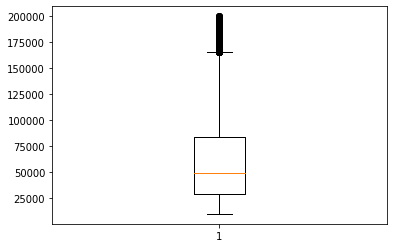

In [27]:
box_plot = data.MonthlyIncome
plt.boxplot(box_plot)

{'whiskers': [<matplotlib.lines.Line2D at 0xba6fae7fc8>,
 'caps': [<matplotlib.lines.Line2D at 0xba6faeec08>,
 'boxes': [<matplotlib.lines.Line2D at 0xba6fae7888>],
 'medians': [<matplotlib.lines.Line2D at 0xba6faeedc8>],
 'fliers': [<matplotlib.lines.Line2D at 0xba6faf5e88>],
 'means': []}

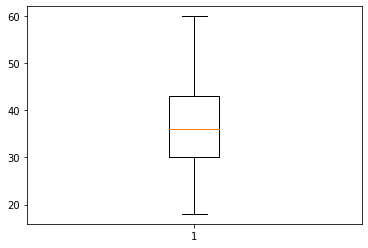

In [28]:
box_plot = data.Age
plt.boxplot(box_plot)

(array([169., 314., 666., 792., 759., 644., 392., 276., 230., 140.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <a list of 10 Patch objects>)

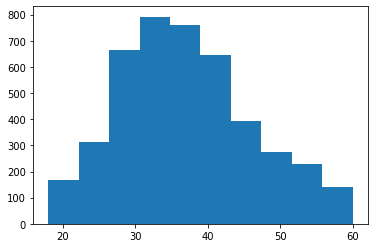

In [29]:
plt.hist(data.Age)

(array([1088., 1041.,  864.,  324.,  326.,  167.,  156.,   54.,  161.,
         201.]),
 array([ 10090.,  29080.,  48070.,  67060.,  86050., 105040., 124030.,
        143020., 162010., 181000., 199990.]),
 <a list of 10 Patch objects>)

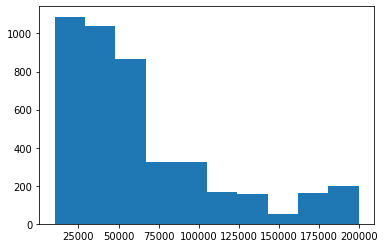

In [39]:
plt.hist(data.MonthlyIncome)